In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('births.csv')
df.head()
print(df.columns)

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')


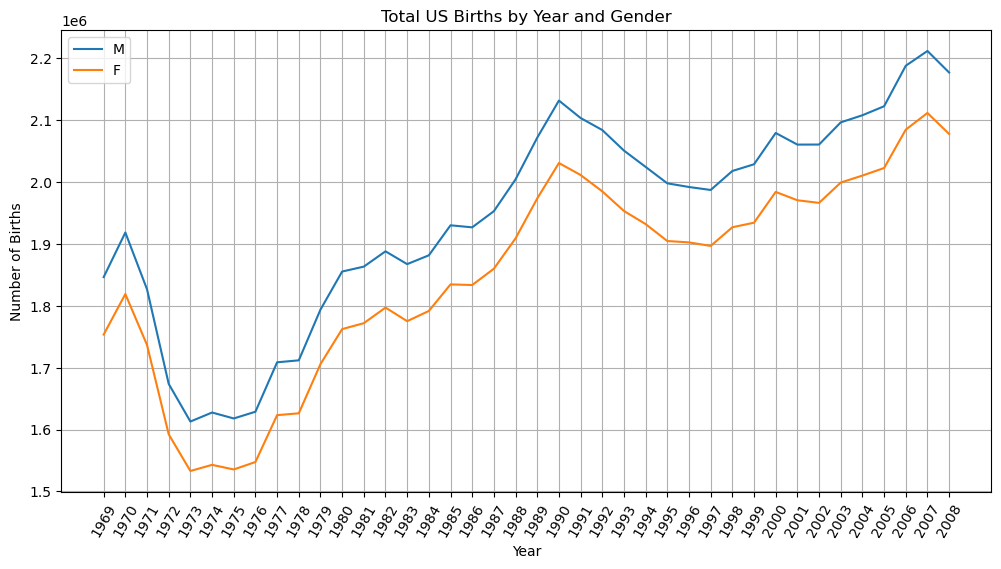

In [3]:
#(i)
total=df.groupby(['year','gender'])['births'].sum()
plt.figure(figsize=(12,6))
for gender in['M','F']:
    plt.plot(total.loc[:,gender].index,total.loc[:,gender].values,label=gender)
years=total.index.get_level_values('year').unique()
plt.xticks(ticks=years,rotation=60)
plt.title('Total US Births by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#(ii)
# Filter valid dates(Remove Invalid Dates)
df = df[(df['month'] >= 1) & (df['month'] <= 12) & (df['day'] >= 1) & (df['day'] <= 31)]

# Convert to datetime and get day of week
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
df['decade']=(df['year']//10)*10 #data.loc[:,'decade']=(data['year']//10)*10

# Group by decade and day of week to calculate average births
avg_daily = df.groupby(['decade', 'day_of_week'])['births'].mean().unstack()
print(avg_daily)

day_of_week       Friday       Monday     Saturday       Sunday     Thursday  \
decade                                                                         
1960         5107.884615  5063.826923  4651.057692  4342.346154  4978.288462   
1970         4782.095785  4689.097701  4207.784483  3979.278736  4696.923372   
1980         5393.087234  5276.907249  4483.901064  4308.120469  5333.485106   

day_of_week      Tuesday    Wednesday  
decade                                 
1960         5286.096154  5074.622642  
1970         4885.252399  4750.376200  
1980         5503.842553  5367.642553  


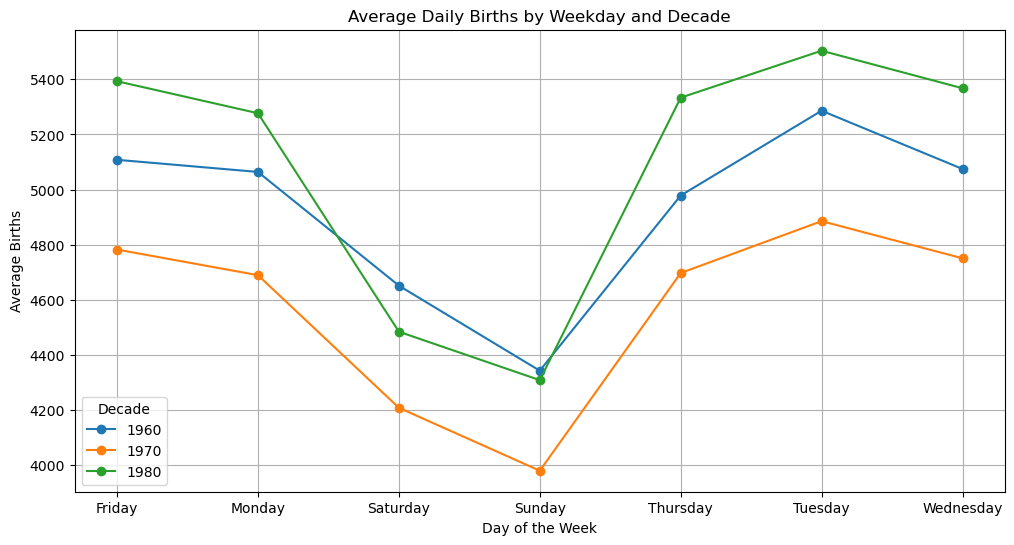

In [5]:
# Plot the average births by day of the week for each decade
avg_daily.T.plot(figsize=(12, 6), marker='o')

# Add labels and title
plt.title("Average Daily Births by Weekday and Decade")
plt.xlabel("Day of the Week")
plt.ylabel("Average Births")
plt.legend(title="Decade")
plt.grid(True)
plt.show()

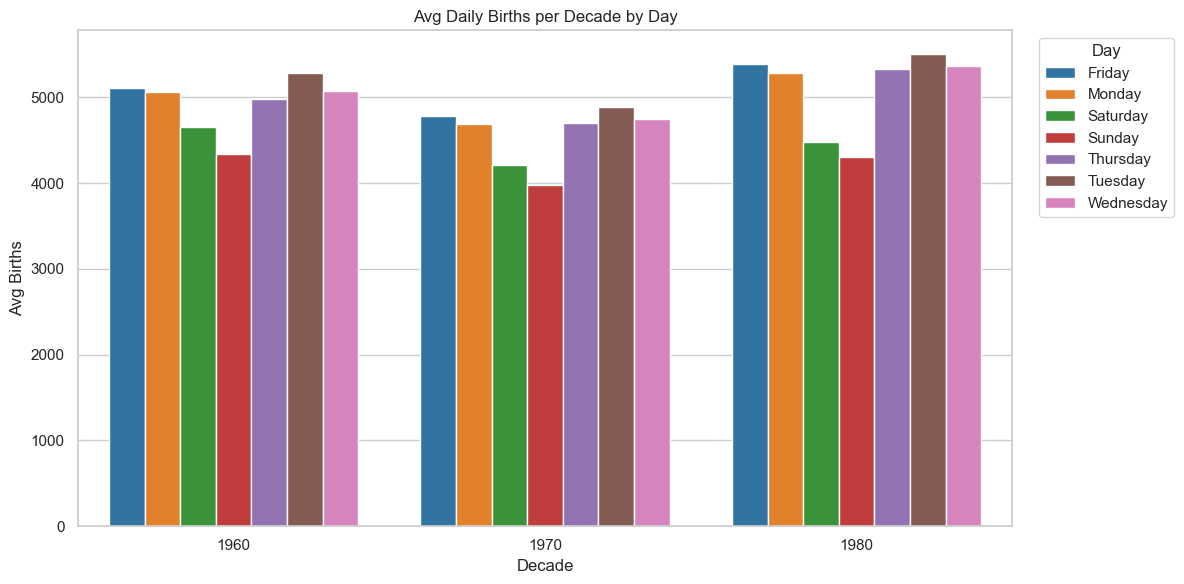

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Reshape the data
data = avg_daily.reset_index().melt(id_vars='decade', var_name='day', value_name='avg_births')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='decade', y='avg_births', hue='day', palette='tab10')
plt.title('Avg Daily Births per Decade by Day')
plt.xlabel('Decade')
plt.ylabel('Avg Births')
plt.legend(title='Day', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()